In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
# csv_files_2017 = [('2017' + "%.2d" + '-citibike-tripdata.csv') % i for i in range(1, 13)]
# csv_files_2018 = [('2018' + "%.2d" + '-citibike-tripdata.csv') % i for i in range(1, 13)]
# csv_files_2019 = [('2019' + "%.2d" + '-citibike-tripdata.csv') % i for i in range(1, 13)]
# csv_files = csv_files_2017 + csv_files_2018 + csv_files_2019

In [49]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [18]:
def to_datetime(df):
    df1 = df.copy()
    df1['starttime'] = pd.to_datetime(df1['starttime'])
    df1['stoptime'] = pd.to_datetime(df1['stoptime'])
    df1['start_date'] = df1['starttime'].dt.date
    df1['start_time'] = df1['starttime'].dt.time
    df1['start_hour'] = df1['starttime'].dt.hour
    df1['start_min'] = df1['starttime'].dt.minute
    df1['start_year'] = df1['starttime'].dt.year
    df1['start_month'] = df1['starttime'].dt.month
    df1['start_dayofweek'] = df1['starttime'].dt.weekday   # Monday is 0, Sunday is 6
    #df1['start_dayofweek'] = df1['starttime'].dt.weekday_name  # The name of day in a week (e.g. Monday)
    df1['stop_date'] = df1['stoptime'].dt.date
    df1['stop_time'] = df1['stoptime'].dt.time
    df1['stop_hour'] = df1['stoptime'].dt.hour
    df1['stop_min'] = df1['stoptime'].dt.minute
    df1['stop_dayofweek'] = df1['stoptime'].dt.weekday
    return df1

In [8]:
def ignore_offpeak(df):
    df1 = df.copy()
    mask = df1['start_hour'].apply(lambda x: 5 <= x <= 20)
    return df1[mask]

In [89]:
# for i, csv in enumerate(csv_files):
#     df_temp = pd.read_csv('../Tripdata/'+csv)
#     df_temp.columns = ['trip_duration','starttime','stoptime','start_station_ID','start_station_name',
#                        'start_station_latitude','start_station_longitude','end_station_ID','end_station_name',
#                        'end_station_latitude','end_station_longitude','bike_ID','user_type','birth_year','gender']
#     df_temp = to_datetime(df_temp)
#     df_temp = ignore_offpeak(df_temp)
#     df_validate, df_train = train_test_split(df_temp, test_size=0.05, random_state=42 )
#     df_notused, df_test = train_test_split(df_validate, test_size=0.05, random_state=42 )
#     df_train.to_csv(months[i%12] + csv[:4] + 'train.csv')
#     df_test.to_csv(months[i%12] + csv[:4] + 'test.csv')
#     print('Finishing data extraction from ' + csv)

In [54]:
# train_list = []
# test_list = []
# for i, csv in enumerate(csv_files):
#     train_list.append(months[i%12] + csv[:4] + 'train.csv')
#     test_list.append(months[i%12] + csv[:4] + 'test.csv')

In [88]:
# train_df = pd.DataFrame()
# for i in range(len(train_list)):
#     temp_df = pd.read_csv(train_list[i], index_col = 0)
#     train_df = pd.concat([train_df, temp_df], axis = 0)
#     print('Finished ' + str(i) + ' element')
# train_df.to_csv('train.csv')

In [87]:
# test_df = pd.DataFrame()
# for i in range(len(test_list)):
#     temp_df = pd.read_csv(test_list[i], index_col = 0)
#     test_df = pd.concat([test_df, temp_df], axis = 0)
#     print('Finished ' + str(i) + ' element')
# test_df.to_csv('test.csv')

In [3]:
train_df = pd.read_csv('train.csv', index_col = 0)

C:\Users\zhang\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
test_df = pd.read_csv('test.csv', index_col = 0)

In [5]:
train_df.columns

Index(['trip_duration', 'starttime', 'stoptime', 'start_station_ID',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_ID', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_ID', 'user_type',
       'birth_year', 'gender', 'start_date', 'start_time', 'start_hour',
       'start_year', 'start_month', 'start_dayofweek', 'stop_date',
       'stop_time', 'stop_hour', 'stop_dayofweek'],
      dtype='object')

In [8]:
# sns.distplot(train_df.starttime)

In [15]:
# group by the dock station
train_df.groupby(['start_station_name']).count()[['trip_duration']].\
sort_values(by = 'trip_duration', ascending = False).head(20)

,trip_duration
start_station_name,
Pershing Square North,22274
E 17 St & Broadway,16055
Broadway & E 22 St,15604
W 21 St & 6 Ave,15123
West St & Chambers St,14540
8 Ave & W 31 St,13697
Broadway & E 14 St,12848
12 Ave & W 40 St,12678
8 Ave & W 33 St,12452


In [20]:
# Group by the start_hour and see the frequency correspond to each starting hour
train_df.groupby('start_hour').count()[['trip_duration']].sort_values(by = 'trip_duration', ascending = False)

,trip_duration
start_hour,
17,266935
18,253655
8,217026
16,193315
19,176140
9,171874
15,166931
14,158987
13,154796


In [21]:
train_df['distance'] = (train_df['trip_duration']/3600)*7.456

In [43]:
pd.set_option('display.max_columns', 30)

In [82]:
train_df.loc[train_df.distance > 10].sort_values(by = 'trip_duration', ascending = False).\
head(20)[['trip_duration', 'starttime', 'stoptime', 'user_type', 'distance']]

,trip_duration,starttime,stoptime,user_type,distance
504143,8096462,2018-02-25 17:06:26.182,2018-05-30 11:07:28.577,Customer,16768.672409
8967,5891578,2018-06-02 13:13:38.597,2018-08-09 17:46:37.272,Customer,12202.112658
208480,5363062,2017-05-04 15:49:08,2017-07-05 17:33:30,Customer,11107.497298
1691226,4602582,2018-05-26 16:42:01.421,2018-07-18 23:11:43.765,Customer,9532.458720
1371992,4318433,2017-05-28 16:55:31,2017-07-17 16:29:25,Subscriber,8943.954569
711286,3897730,2017-10-12 15:16:31,2017-11-26 16:58:41,Customer,8072.631911
633697,3653986,2018-04-26 18:27:22.296,2018-06-08 01:27:09.083,Customer,7567.811004
1877579,3553060,2018-06-18 19:32:57.135,2018-07-29 22:30:37.590,Customer,7358.782044
385277,3341929,2019-08-05 19:53:13.655,2019-09-13 12:12:02.969,Customer,6921.506284
1552801,3274876,2017-10-25 16:17:46,2017-12-02 12:59:03,Customer,6782.632071


In [52]:
train_df.loc[(train_df.distance > 10) & (train_df.user_type == 'Subscriber')].shape[0]/\
train_df.loc[(train_df.distance > 10)].shape[0]

0.25863274150705995

In [35]:
14306/2479389

0.005769969940174777

In [48]:
train_df.loc[train_df.user_type == 'Subscriber'].shape[0]/train_df.shape[0]

0.8786289686692972

In [49]:
train_df.loc[train_df.user_type != 'Subscriber'].shape[0]/train_df.shape[0]

0.12137103133070284

In [53]:
train_df

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,end_station_longitude,bike_ID,user_type,birth_year,gender,start_date,start_time,start_hour,start_year,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_dayofweek,distance
373360,1422,2017-01-18 16:50:30,2017-01-18 17:14:13,546.0,E 30 St & Park Ave S,40.744449,-73.983035,3288.0,E 88 St & 1 Ave,40.778301,-73.948813,26352,Subscriber,1981.0,1,2017-01-18,16:50:30,16,2017,1,2,2017-01-18,17:14:13,17,2,2.945120
232891,1704,2017-01-12 17:11:36,2017-01-12 17:40:01,360.0,William St & Pine St,40.707179,-74.008873,501.0,FDR Drive & E 35 St,40.744219,-73.971212,17592,Subscriber,1988.0,1,2017-01-12,17:11:36,17,2017,1,3,2017-01-12,17:40:01,17,3,3.529173
631844,105,2017-01-28 10:24:42,2017-01-28 10:26:27,3085.0,Roebling St & N 4 St,40.714690,-73.957390,3087.0,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,18974,Subscriber,1989.0,1,2017-01-28,10:24:42,10,2017,1,5,2017-01-28,10:26:27,10,5,0.217467
180306,553,2017-01-11 08:20:15,2017-01-11 08:29:29,3236.0,W 42 St & Dyer Ave,40.758985,-73.993800,3159.0,W 67 St & Broadway,40.774925,-73.982666,27109,Subscriber,1976.0,1,2017-01-11,08:20:15,8,2017,1,2,2017-01-11,08:29:29,8,2,1.145324
317049,757,2017-01-16 10:07:03,2017-01-16 10:19:40,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,457.0,Broadway & W 58 St,40.766953,-73.981693,14687,Subscriber,1979.0,2,2017-01-16,10:07:03,10,2017,1,0,2017-01-16,10:19:40,10,0,1.567831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490110,539,2019-12-15 08:31:56.079,2019-12-15 08:40:55.945,3558.0,Bergen St & Vanderbilt Ave,40.679439,-73.968044,3407.0,Union St & Nevins St,40.679098,-73.987655,30214,Subscriber,1977.0,1,2019-12-15,08:31:56.079000,8,2019,12,6,2019-12-15,08:40:55.945000,8,6,1.116329
274473,991,2019-12-08 17:23:11.563,2019-12-08 17:39:42.878,517.0,Pershing Square South,40.751581,-73.977910,3135.0,E 75 St & 3 Ave,40.771129,-73.957723,39046,Subscriber,1957.0,1,2019-12-08,17:23:11.563000,17,2019,12,6,2019-12-08,17:39:42.878000,17,6,2.052471
59663,69,2019-12-03 18:43:09.990,2019-12-03 18:44:19.132,312.0,Allen St & Stanton St,40.722055,-73.989111,401.0,Allen St & Rivington St,40.720196,-73.989978,40420,Subscriber,1982.0,1,2019-12-03,18:43:09.990000,18,2019,12,1,2019-12-03,18:44:19.132000,18,1,0.142907
105023,484,2019-12-04 18:27:47.149,2019-12-04 18:35:51.971,2000.0,Front St & Washington St,40.702551,-73.989402,245.0,Myrtle Ave & St Edwards St,40.693270,-73.977039,40086,Subscriber,1997.0,1,2019-12-04,18:27:47.149000,18,2019,12,2,2019-12-04,18:35:51.971000,18,2,1.002418


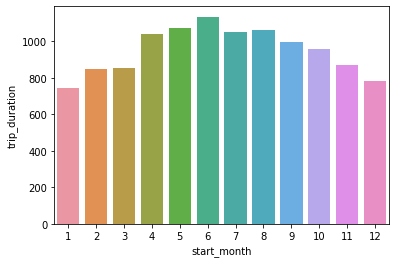

In [71]:
sns.barplot(x = a.start_month, y = a.trip_duration)

In [69]:
a = train_df.groupby('start_month').mean()[['trip_duration']].reset_index()

In [72]:
b = train_df.groupby('start_month').count()[['trip_duration']].reset_index()

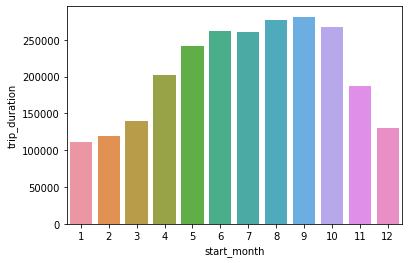

In [73]:
sns.barplot(x = b.start_month, y = b.trip_duration)

In [74]:
c = train_df.groupby('start_month').mean()[['distance']].reset_index()

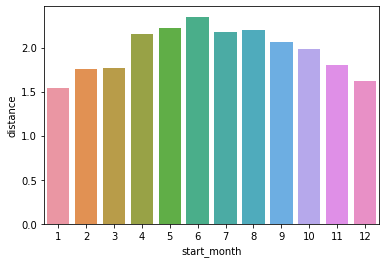

In [77]:
sns.barplot(x = c.start_month, y = c.distance)

In [78]:
weather = pd.read_csv('weather.csv',index_col = 0)
weather = weather.fillna(0)
weather.reset_index(inplace=True)
weather['DATE'] = pd.to_datetime(weather['DATE'])

,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,Fog,Heavy_Fog,Thunder,Hail,Glaze,Haze
0,2017-01-01,5.59,0.00,0.0,0.0,48,40,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-01-02,9.17,0.21,0.0,0.0,41,37,1.0,0.0,0.0,1.0,0.0,0.0
2,2017-01-03,10.74,0.58,0.0,0.0,43,39,1.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-04,8.05,0.00,0.0,0.0,52,34,1.0,0.0,0.0,0.0,0.0,1.0
4,2017-01-05,7.83,0.00,0.0,0.0,34,27,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,4.47,0.00,0.0,0.0,54,46,0.0,0.0,0.0,0.0,0.0,0.0
1091,2019-12-28,4.03,0.00,0.0,0.0,51,43,1.0,0.0,0.0,0.0,0.0,1.0
1092,2019-12-29,4.92,0.25,0.0,0.0,44,39,1.0,0.0,0.0,0.0,0.0,0.0
1093,2019-12-30,12.75,0.74,0.0,0.0,41,37,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df['start_date'] = pd.to_datetime(train_df['start_date'])
train_df_weather = train_df.merge(weather,how='left',
                                  left_on = 'start_date', right_on = 'DATE').drop(['DATE'],axis=1)

NameError: name 'weather' is not defined

In [84]:
test_df['start_date'] = pd.to_datetime(test_df['start_date'])
test_df_weather = test_df.merge(weather,how='left',
                                  left_on = 'start_date', right_on = 'DATE').drop(['DATE'],axis=1)

In [ ]:
train_df_weather.to_csv('train_weather.csv')
test_df_weather.to_csv('test_weather.csv')

### Create Custom Features (bike checkin and check out counts)

In [111]:
Jan2017 = pd.read_csv('../Tripdata/201701-citibike-tripdata.csv',index_col = 0).reset_index()
Jan2017.columns= ['trip_duration','starttime','stoptime','start_station_ID','start_station_name',
                       'start_station_latitude','start_station_longitude','end_station_ID','end_station_name',
                       'end_station_latitude','end_station_longitude','bike_ID','user_type','birth_year','gender']
Jan2017

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,end_station_longitude,bike_ID,user_type,birth_year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726671,340,2017-01-31 23:59:14,2017-02-01 00:04:55,267,Broadway & W 36 St,40.750977,-73.987654,527,E 33 St & 2 Ave,40.744023,-73.976056,17133,Subscriber,1977.0,1
726672,338,2017-01-31 23:59:23,2017-02-01 00:05:01,3092,Berry St & N 8 St,40.719009,-73.958525,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,18810,Subscriber,1972.0,1
726673,79,2017-01-27 04:59:49,2017-01-27 05:01:08,3245,Kiosk in a box Motivate,40.646678,-74.016303,3245,Kiosk in a box Motivate,40.646678,-74.016303,24777,Subscriber,1992.0,1
726674,711,2017-01-27 06:23:29,2017-01-27 06:35:21,3245,Kiosk in a box Motivate,40.646678,-74.016303,3245,Kiosk in a box Motivate,40.646678,-74.016303,24777,Subscriber,1992.0,1


In [112]:
Jan2017 = to_datetime(Jan2017)

In [114]:
checkout=Jan2017.groupby(['start_station_ID','start_date','start_hour'])['trip_duration'].count().reset_index()
checkout.columns=['start_station_ID','start_date','start_hour','checkout_counts']
checkout

,start_station_ID,start_date,start_hour,checkout_counts
0,72,2017-01-01,2,1
1,72,2017-01-01,3,1
2,72,2017-01-01,5,2
3,72,2017-01-01,8,2
4,72,2017-01-01,9,1
...,...,...,...,...
209518,3443,2017-01-31,18,14
209519,3443,2017-01-31,19,2
209520,3443,2017-01-31,20,1
209521,3446,2017-01-30,17,1


In [115]:
checkin = Jan2017.groupby(['end_station_ID','stop_date','stop_hour'])[['trip_duration']].count().reset_index()
checkin.columns=['end_station_ID','stop_date','stop_hour','checkin_counts']
checkin

,end_station_ID,stop_date,stop_hour,checkin_counts
0,72,2017-01-01,0,1
1,72,2017-01-01,2,1
2,72,2017-01-01,4,1
3,72,2017-01-01,8,2
4,72,2017-01-01,9,1
...,...,...,...,...
209919,3443,2017-01-31,19,3
209920,3446,2017-01-30,17,1
209921,3446,2017-01-30,19,1
209922,3447,2017-01-31,17,1


In [116]:
temp = pd.merge(checkout, checkin,  how='outer', left_on=['start_station_ID','start_date','start_hour'], right_on = ['end_station_ID','stop_date','stop_hour'])
temp

,start_station_ID,start_date,start_hour,checkout_counts,end_station_ID,stop_date,stop_hour,checkin_counts
0,72.0,2017-01-01,2.0,1.0,72.0,2017-01-01,2.0,1.0
1,72.0,2017-01-01,3.0,1.0,NaN,NaN,NaN,NaN
2,72.0,2017-01-01,5.0,2.0,NaN,NaN,NaN,NaN
3,72.0,2017-01-01,8.0,2.0,72.0,2017-01-01,8.0,2.0
4,72.0,2017-01-01,9.0,1.0,72.0,2017-01-01,9.0,1.0
...,...,...,...,...,...,...,...,...
265645,NaN,NaN,NaN,NaN,3443.0,2017-01-31,5.0,2.0
265646,NaN,NaN,NaN,NaN,3443.0,2017-01-31,8.0,19.0
265647,NaN,NaN,NaN,NaN,3443.0,2017-01-31,13.0,1.0
265648,NaN,NaN,NaN,NaN,3447.0,2017-01-31,17.0,1.0


In [117]:
temp['start_station_ID'] = temp['start_station_ID'].fillna(temp['end_station_ID'])
temp['start_date'] = temp['start_date'].fillna(temp['stop_date'])
temp['start_hour'] = temp['start_hour'].fillna(temp['stop_hour'])
temp['checkout_counts'] = temp['checkout_counts'].fillna(0)
temp['checkin_counts'] = temp['checkin_counts'].fillna(0)
temp = temp.drop(['end_station_ID','stop_date','stop_hour'],axis=1)
temp.columns=['station_ID','date','hour','checkout_counts','checkin_counts']
temp['bike_added'] = temp['checkin_counts'] - temp['checkout_counts']
temp

,station_ID,date,hour,checkout_counts,checkin_counts,bike_added
0,72.0,2017-01-01,2.0,1.0,1.0,0.0
1,72.0,2017-01-01,3.0,1.0,0.0,-1.0
2,72.0,2017-01-01,5.0,2.0,0.0,-2.0
3,72.0,2017-01-01,8.0,2.0,2.0,0.0
4,72.0,2017-01-01,9.0,1.0,1.0,0.0
...,...,...,...,...,...,...
265645,3443.0,2017-01-31,5.0,0.0,2.0,2.0
265646,3443.0,2017-01-31,8.0,0.0,19.0,19.0
265647,3443.0,2017-01-31,13.0,0.0,1.0,1.0
265648,3447.0,2017-01-31,17.0,0.0,1.0,1.0


In [118]:
# Merge to get start station checkin and checkout data
Jan2017_merged = pd.merge(Jan2017, temp,  how='left', left_on=['start_station_ID','start_date','start_hour'], \
         right_on = ['station_ID','date','hour'])
Jan2017_merged = Jan2017_merged.drop(['station_ID','date','hour'],axis = 1)

In [120]:
# Merge to get end station checkin and checkout data 
Jan2017_merged = pd.merge(Jan2017_merged, temp,  how='left', left_on=['end_station_ID','stop_date','stop_hour'], \
         right_on = ['station_ID','date','hour'])

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,...,start_hour,start_min,start_year,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_min,stop_dayofweek
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,...,0,0,2017,1,6,2017-01-01,00:11:41,0,11,6
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,...,0,0,2017,1,6,2017-01-01,00:22:08,0,22,6
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,...,0,0,2017,1,6,2017-01-01,00:11:46,0,11,6
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,...,0,1,2017,1,6,2017-01-01,00:11:42,0,11,6
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,...,0,1,2017,1,6,2017-01-01,00:11:47,0,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726671,340,2017-01-31 23:59:14,2017-02-01 00:04:55,267,Broadway & W 36 St,40.750977,-73.987654,527,E 33 St & 2 Ave,40.744023,...,23,59,2017,1,1,2017-02-01,00:04:55,0,4,2
726672,338,2017-01-31 23:59:23,2017-02-01 00:05:01,3092,Berry St & N 8 St,40.719009,-73.958525,3110,Meserole Ave & Manhattan Ave,40.727086,...,23,59,2017,1,1,2017-02-01,00:05:01,0,5,2
726673,79,2017-01-27 04:59:49,2017-01-27 05:01:08,3245,Kiosk in a box Motivate,40.646678,-74.016303,3245,Kiosk in a box Motivate,40.646678,...,4,59,2017,1,4,2017-01-27,05:01:08,5,1,4
726674,711,2017-01-27 06:23:29,2017-01-27 06:35:21,3245,Kiosk in a box Motivate,40.646678,-74.016303,3245,Kiosk in a box Motivate,40.646678,...,6,23,2017,1,4,2017-01-27,06:35:21,6,35,4


In [122]:
Jan2017_merged = Jan2017_merged.drop(['station_ID', 'date', 'hour'],axis = 1)

In [130]:
pd.set_option('display.max_columns', 40)

In [131]:
Jan2017_merged.head(10)

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,end_station_longitude,bike_ID,user_type,birth_year,gender,start_date,start_time,start_hour,start_min,start_year,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_min,stop_dayofweek,start_station_checkout_counts,start_station_checkin_counts,start_station_bike_added,end_station_checkout_counts,end_station_checkin_counts,end_station_bike_added
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,2017-01-01,00:00:21,0,0,2017,1,6,2017-01-01,00:11:41,0,11,6,2.0,1.0,-1.0,4.0,2.0,-2.0
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,2017-01-01,00:00:45,0,0,2017,1,6,2017-01-01,00:22:08,0,22,6,2.0,4.0,2.0,2.0,1.0,-1.0
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,2017-01-01,00:00:57,0,0,2017,1,6,2017-01-01,00:11:46,0,11,6,15.0,0.0,-15.0,0.0,3.0,3.0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0,2017-01-01,00:01:10,0,1,2017,1,6,2017-01-01,00:11:42,0,11,6,15.0,0.0,-15.0,0.0,3.0,3.0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0,2017-01-01,00:01:25,0,1,2017,1,6,2017-01-01,00:11:47,0,11,6,15.0,0.0,-15.0,0.0,3.0,3.0
5,666,2017-01-01 00:01:51,2017-01-01 00:12:57,3163,Central Park West & W 68 St,40.773407,-73.977825,3163,Central Park West & W 68 St,40.773407,-73.977825,16050,Subscriber,2000.0,1,2017-01-01,00:01:51,0,1,2017,1,6,2017-01-01,00:12:57,0,12,6,4.0,2.0,-2.0,4.0,2.0,-2.0
6,559,2017-01-01 00:05:00,2017-01-01 00:14:20,499,Broadway & W 60 St,40.769155,-73.981918,479,9 Ave & W 45 St,40.760193,-73.991255,27294,Subscriber,1973.0,1,2017-01-01,00:05:00,0,5,2017,1,6,2017-01-01,00:14:20,0,14,6,4.0,0.0,-4.0,1.0,2.0,1.0
7,826,2017-01-01 00:05:37,2017-01-01 00:19:24,362,Broadway & W 37 St,40.751726,-73.987535,445,E 10 St & Avenue A,40.727408,-73.981420,23288,Subscriber,1977.0,2,2017-01-01,00:05:37,0,5,2017,1,6,2017-01-01,00:19:24,0,19,6,2.0,0.0,-2.0,1.0,1.0,0.0
8,255,2017-01-01 00:05:47,2017-01-01 00:10:02,430,York St & Jay St,40.701485,-73.986569,242,Carlton Ave & Flushing Ave,40.697787,-73.973736,25041,Subscriber,1989.0,1,2017-01-01,00:05:47,0,5,2017,1,6,2017-01-01,00:10:02,0,10,6,1.0,1.0,0.0,0.0,1.0,1.0
9,634,2017-01-01 00:07:34,2017-01-01 00:18:08,3165,Central Park West & W 72 St,40.775794,-73.976206,3164,Columbus Ave & W 72 St,40.777057,-73.978985,16311,Subscriber,1980.0,1,2017-01-01,00:07:34,0,7,2017,1,6,2017-01-01,00:18:08,0,18,6,4.0,2.0,-2.0,4.0,2.0,-2.0


In [124]:
Jan2017_merged = Jan2017_merged.rename(columns={'checkout_counts_x':'start_station_checkout_counts','checkin_counts_x':'start_station_checkin_counts',\
                              'bike_added_x':'start_station_bike_added', 'checkout_counts_y':'end_station_checkout_counts',\
                               'checkin_counts_y':'end_station_checkin_counts','bike_added_y':'end_station_bike_added'})

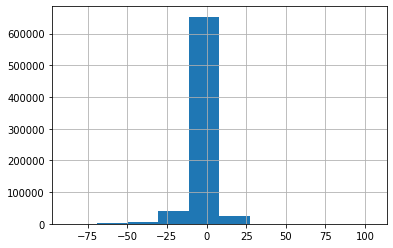

In [125]:
Jan2017_merged.start_station_bike_added.hist()

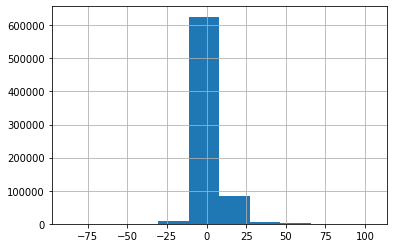

In [126]:
Jan2017_merged.end_station_bike_added.hist()